## Pre-processing: &thinsp; Vertical pressure velocity - WAP 

**Missing data** <br>
*No wap data:* <br>
cmip5: <br>
> 1. 'GISS-E2-H' <br>
> 2. 'HadGEM2-CC' <br>
> 3. 'EC-EARTH' <br>

cmip6: <br>
>- All models have data <br>

<br>

*Only monthly data:* <br>
cmip5: <br>
>1. 'CCSM4' <br>
>2. 'HadGEM2-AO' <br>
>3. 'inmcm4' <br>
>4. 'CESM1-BGC' <br>
>5. 'bcc-csm1-1' (experiment: 'rcp85') <br>

cmip6: <br>
>- All models are monthly <br>

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *
%matplotlib inline

# %matplotlib inline
# %matplotlib qt

### one dataset

In [2]:
variable = 'wap'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3  no wap data
    # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6  only monthly wap
    # 'HadGEM2-AO',   # 7  only monthly wap
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9  no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 only monthly wap
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 only monthly wap
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    # 'BCC-CSM2-MR',    # 2
    # 'FGOALS-g3',      # 3
    # 'CNRM-CM6-1',     # 4
    # 'MIROC6',         # 5
    # 'MPI-ESM1-2-HR',  # 6
    # 'NorESM2-MM',     # 7
    # 'GFDL-CM4',       # 8
    # 'CanESM5',        # 9
    # 'CMCC-ESM2',      # 10
    # 'UKESM1-0-LL',    # 11
    # 'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    # 'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    # 'orig',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'ssp585'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])
ds

variable:wap, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, plev: 19, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    wap      (time, plev, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               wap
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/e871c66d-4f95-4535-88fe-a6071843749a

In [3]:
data = ds[variable]
data

<xarray.DataArray 'wap' (time: 360, plev: 19, lat: 22, lon: 128)>
[19261440 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

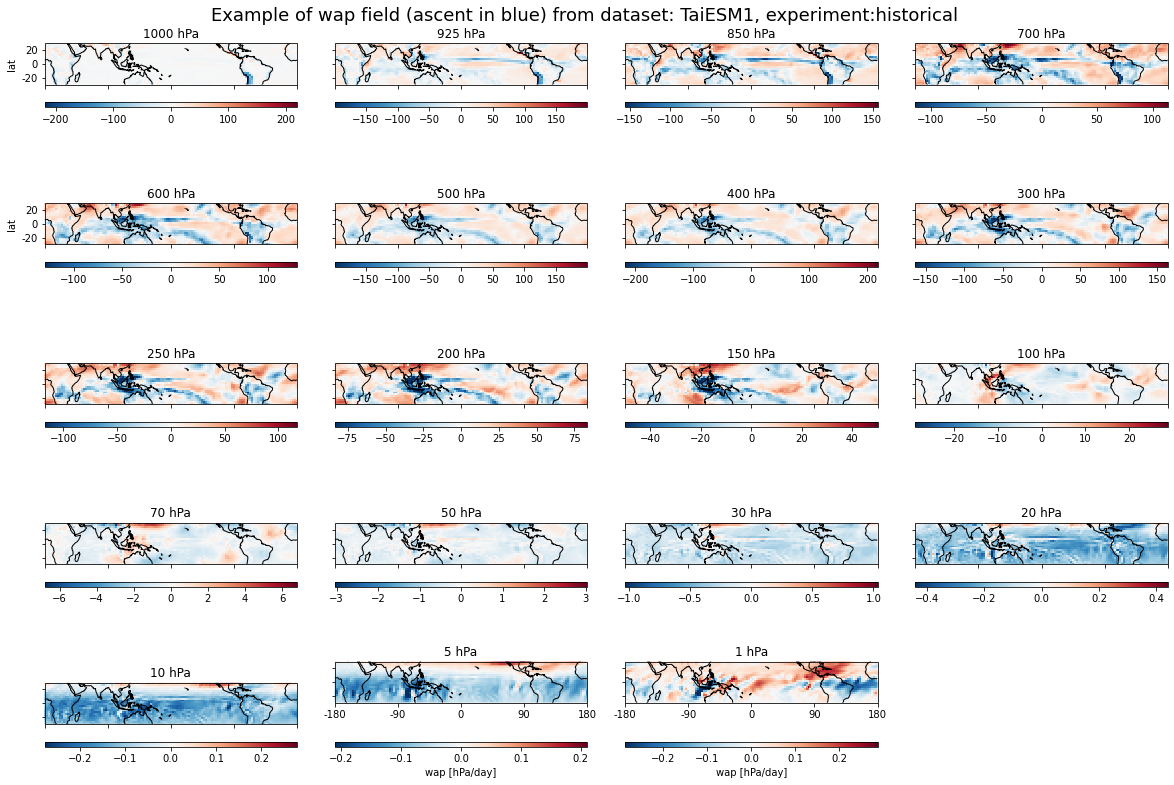

In [4]:
fig= plt.figure(figsize=(20,25))
title = 'Example of {} field (ascent in blue) from dataset: {}, experiment:{}'.format(variable, datasets[0], experiments[0])
fig.suptitle(title, fontsize=18, x= 0.575, y=0.63)

for i, plev in enumerate(data['plev']):
    if len(data.plev) <= 8:
        rows = 4
        cols = 2
    else:
        rows = 5
        cols = 4

    ax= fig.add_subplot(rows,cols,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = data.isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    vmax = scene.sel(plev=plev).max()
    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='RdBu_r', vmin=-vmax, vmax=vmax)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')
    if i>=len(data.plev)-2:
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055, label = 'wap [hPa/day]')

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)

    if i== 0 or i==4:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.775)

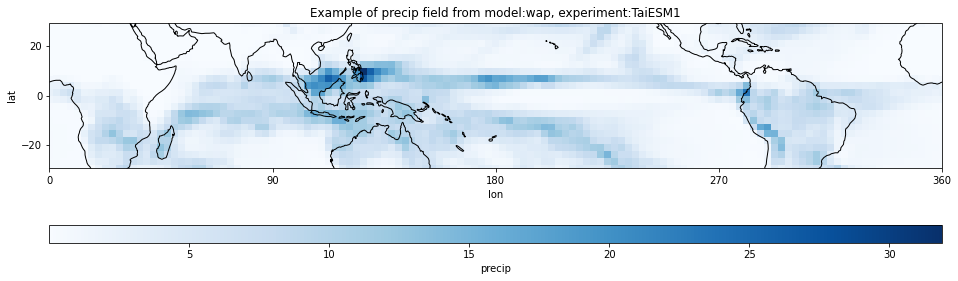

In [5]:
scene = get_dsvariable('precip', datasets[0], experiments[0], resolution=resolutions[0])['precip'].isel(time=0)
if len(data)<1000:
    scene = get_dsvariable('precip', datasets[0], experiments[0], resolution=resolutions[0])['precip'].resample(time='M').mean(dim='time').isel(time=0)
title = 'Example of precip field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

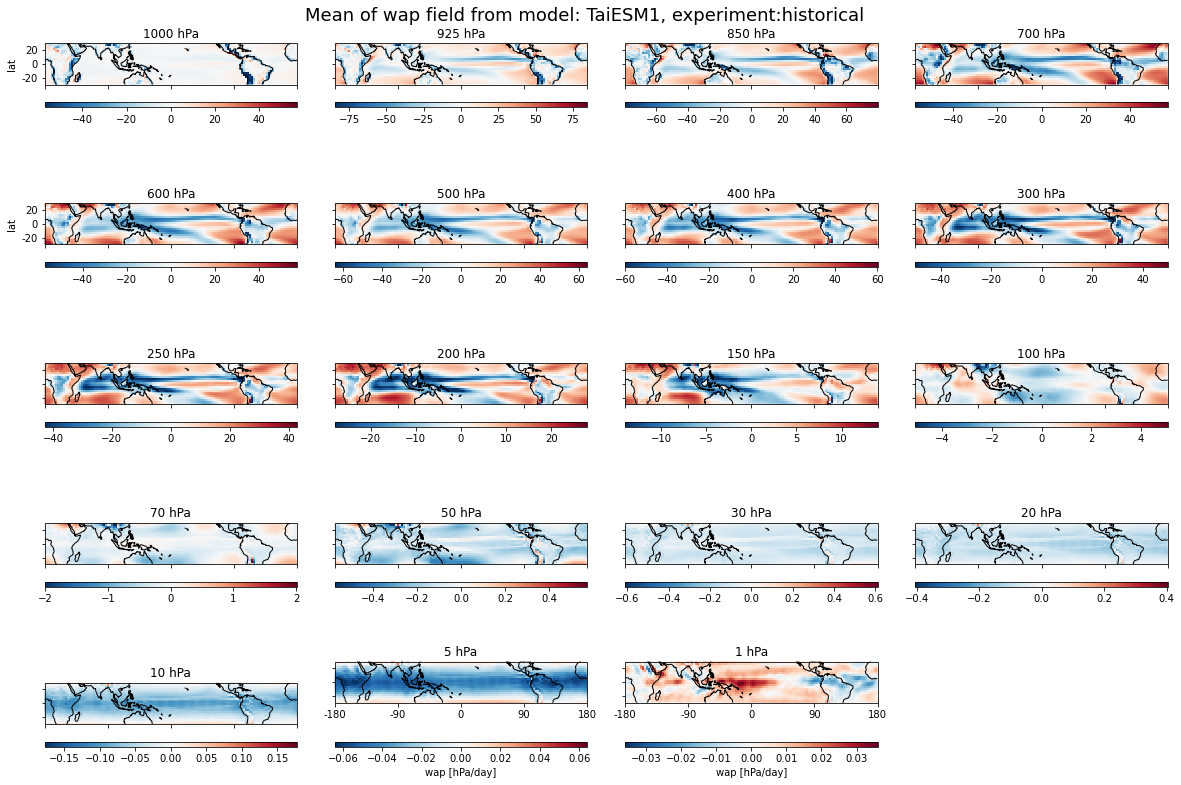

In [6]:
fig= plt.figure(figsize=(20,25))
title = 'Mean of {} field from model: {}, experiment:{}'.format(variable, datasets[0], experiments[0])
fig.suptitle(title, fontsize=18, x= 0.575, y=0.63)

for i, plev in enumerate(data['plev']):
    if len(data.plev) <= 8:
        rows = 4
        cols = 2
    else:
        rows = 5
        cols = 4

    ax= fig.add_subplot(rows,cols,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    scene = data.mean(dim = 'time')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    vmax = scene.sel(plev=plev).max()
    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='RdBu_r', vmin=-vmax, vmax=vmax)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')
    if i>=len(data.plev)-2:
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055, label = 'wap [hPa/day]')

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        

    if i== 0 or i==4:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.775)

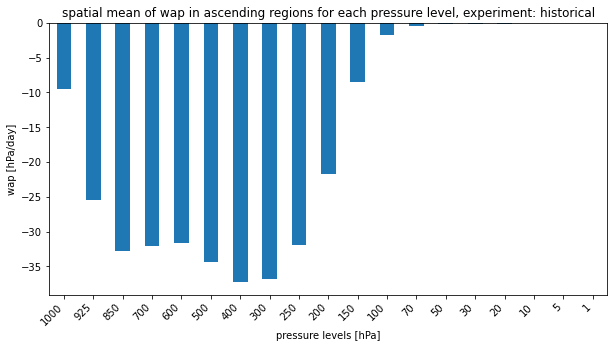

In [7]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
wap_ascent = data.where(data<0)
wap_ascent.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean of wap in ascending regions for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('wap [{}]'.format('hPa/day'))
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((data.plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

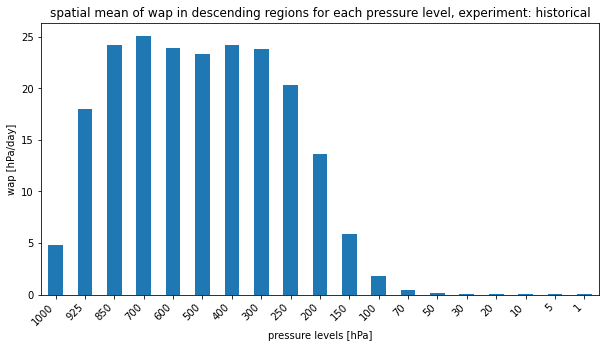

In [8]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
wap_descent = data.where(data>0)
wap_descent.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean of wap in descending regions for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('wap [{}]'.format('hPa/day'))
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((data.plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

In [9]:
data['plev']

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0

### comparing datasets

In [10]:
variable = 'wap'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # # 'GISS-E2-H',    # 3  no wap data
    # # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
    # 'CNRM-CM5',     # 5
    # # 'CCSM4',        # 6  only monthly wap
    # # 'HadGEM2-AO',   # 7  only monthly wap
    # 'BNU-ESM',      # 8
    # # 'EC-EARTH',     # 9  no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # # 'inmcm4',       # 13 only monthly wap
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # # 'CESM1-BGC'     # 19 only monthly wap
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

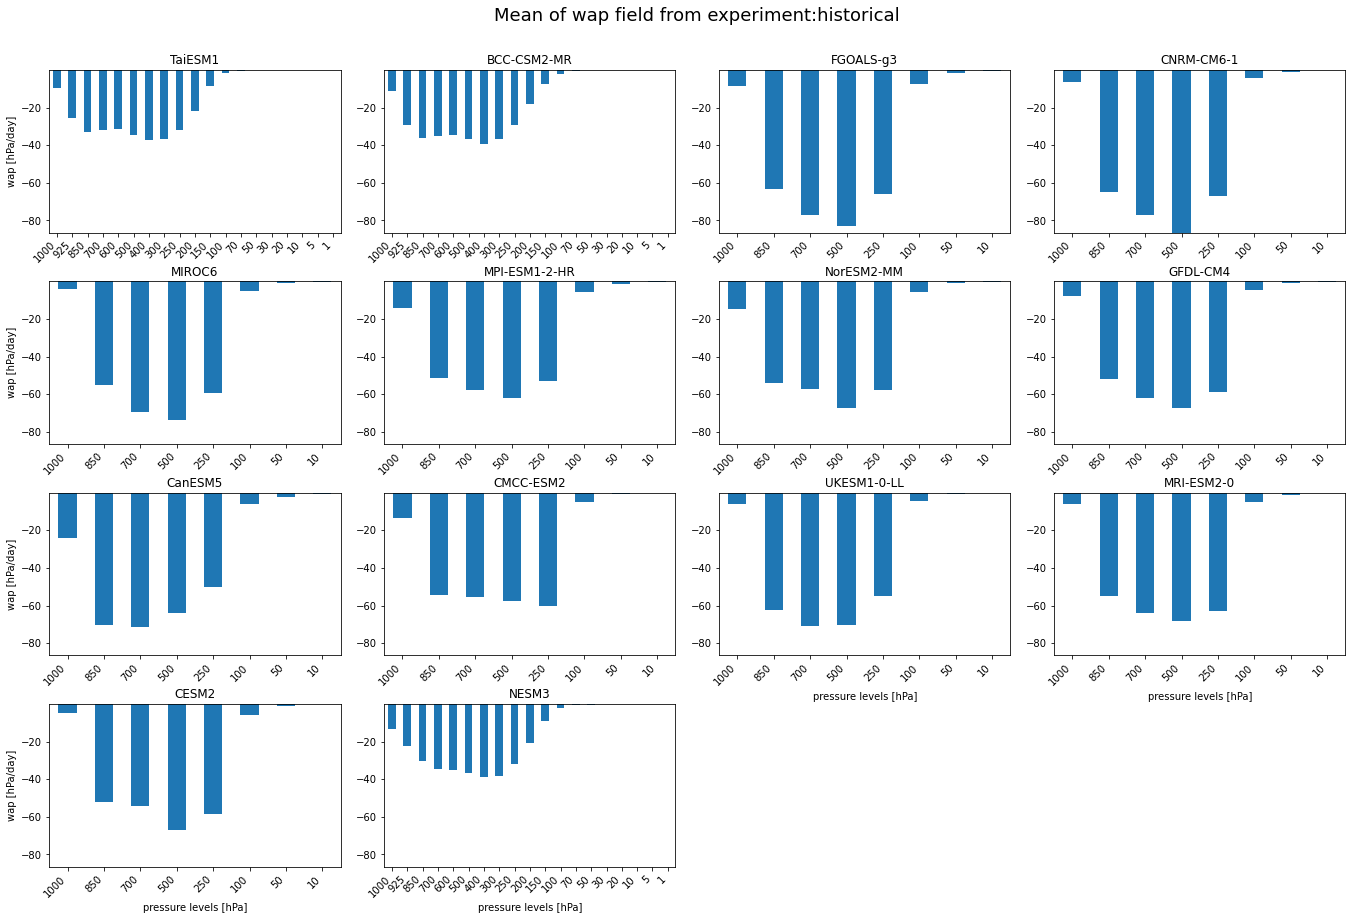

In [11]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])['wap']
        aWeights = np.cos(np.deg2rad(data.lat))
        wap_ascent = data.where(data<0)
        y= wap_ascent.weighted(aWeights).mean(dim=('time','lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Mean of {} field from experiment:{}'.format(variable, experiments[0])
fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])['wap']
    aWeights = np.cos(np.deg2rad(data.lat))
    wap_ascent = data.where(data<0)
    
    ax= fig.add_subplot(5,4,i+1)
    wap_ascent.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data.plev.values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('wap [hPa/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

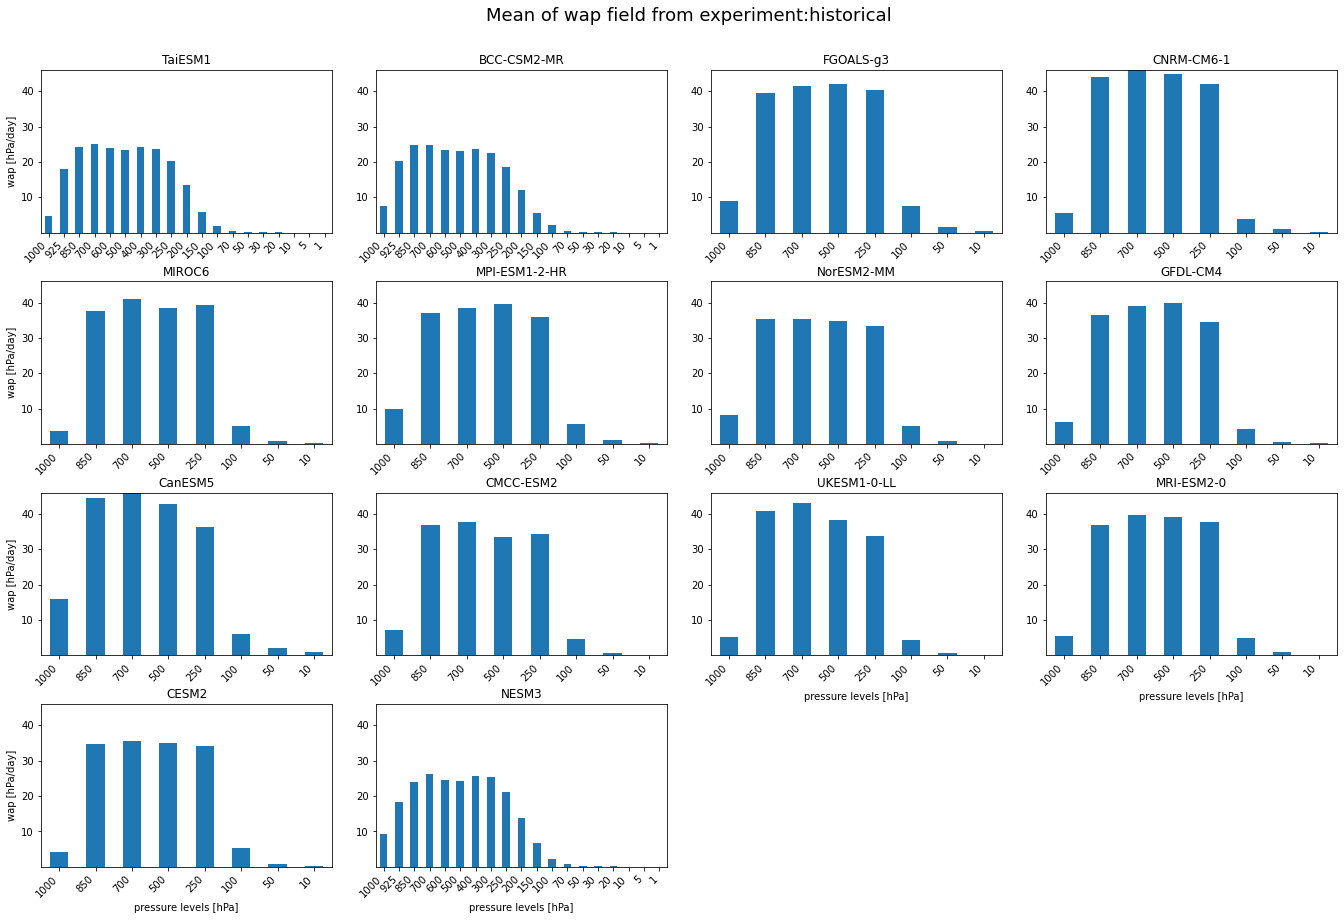

In [12]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])['wap']
        aWeights = np.cos(np.deg2rad(data.lat))
        wap_ascent = data.where(data>0)
        y= wap_ascent.weighted(aWeights).mean(dim=('time','lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Mean of {} field from experiment:{}'.format(variable, experiments[0])
fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])['wap']
        
    aWeights = np.cos(np.deg2rad(data.lat))
    wap_ascent = data.where(data>0)
    
    ax= fig.add_subplot(5,4,i+1)
    wap_ascent.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data.plev.values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('wap [hPa/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

### vertically interpolate

In [13]:
## interpolate

### pick out 500 hpa level

In [14]:
# execute = False
# if execute:
#     models_cmip5 = [
#         # 'IPSL-CM5A-MR', # 1
#         # 'GFDL-CM3',     # 2
#         # # 'GISS-E2-H',    # 3  no wap data
#         # # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
#         # 'CNRM-CM5',     # 5
#         # # 'CCSM4',        # 6  only monthly wap
#         # # 'HadGEM2-AO',   # 7  only monthly wap
#         # 'BNU-ESM',      # 8
#         # # 'EC-EARTH',     # 9  no wap data
#         # 'FGOALS-g2',    # 10
#         # 'MPI-ESM-MR',   # 11
#         # 'CMCC-CM',      # 12
#         # # 'inmcm4',       # 13 only monthly wap
#         # 'NorESM1-M',    # 14
#         # 'CanESM2',      # 15
#         # 'MIROC5',       # 16
#         # # 'HadGEM2-CC',   # 17 no wap data
#         # 'MRI-CGCM3',    # 18
#         # # 'CESM1-BGC'     # 19 only monthly wap
#         ]


#     models_cmip6 = [     
#         # 'TaiESM1',        # 1
#         # 'BCC-CSM2-MR',    # 2
#         # 'FGOALS-g3',      # 3
#         # 'CNRM-CM6-1',     # 4
#         # 'MIROC6',         # 5
#         # 'MPI-ESM1-2-HR',  # 6
#         # 'NorESM2-MM',     # 7
#         # 'GFDL-CM4',       # 8
#         # 'CanESM5',        # 9
#         # 'CMCC-ESM2',      # 10
#         # 'UKESM1-0-LL',    # 11
#         # 'MRI-ESM2-0',     # 12
#         # 'CESM2',          # 13
#         # 'NESM3'           # 14
#         ]


#     datasets = models_cmip5 + models_cmip6

#     resolutions = [
#         # 'orig',
#         'regridded'
#         ]

#     experiments =[
#         'historical',
#         # 'rcp85'
#         ]

#     for dataset in datasets:
#         for experiment in experiments:
#             ds = get_dsvariable(variable, dataset, experiment, home, resolutions[0])
#             wap500 = ds['wap'].sel(plev=500e2)

#             ds_wap = xr.Dataset(
#                 data_vars = {'wap500': wap500},
#                 attrs = ds.attrs
#                 )

#             save_wap = False
#             if np.isin(models_cmip5, dataset).any():
#                 project = 'cmip5'
#             elif np.isin(models_cmip6, dataset).any():
#                 project = 'cmip6'

#             folder_save = home + '/data/' + project + '/' + 'ds_' + project + '_' + resolutions[0] + '/' + dataset 
#             if save_wap:
#                 fileName = dataset + '_wap500_' + experiment + '_' + resolutions[0] +  '.nc'
#                 save_file(ds_wap, folder_save, fileName)